<a href="https://colab.research.google.com/github/HJSang/ReadingNote/blob/master/Generalization_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This colab is to test the generalization of SGD
* Start from the simplest case || Xbeta - Y||_2^2
* first, train the objective function to 0 when d> n
* test if ||beta|| has the largest margin 
* evaluate test error

In [0]:
# imports
import numpy as np
from numpy.random import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
## simulate X, Y
## X sim N(0, V)
def GenerateXY(n,d):
  # mean 0 variance V
  n = int(n)
  d = int(d)
  V = np.zeros((d,d))
  for i in range(d):
    for j in range(d):
      V[i,j] = 0.5**(abs(i-j))
#   print(V)
  X = multivariate_normal(np.zeros(d), V,(n))
  print(X.shape)
  beta = np.zeros(d)
  beta[0:3] = 1
  alpha = np.matmul(X,beta)
  Y = np.sign(alpha)
  return X,Y
  

In [4]:
np.random.seed(2019)
X_train, Y_train = GenerateXY(100, 1000)
X_test, Y_test = GenerateXY(100, 1000)

(100, 1000)
(100, 1000)


In [0]:
def obj_L2 (beta, X, Y):
  alpha = np.matmul(X, beta)
  return np.mean((Y- alpha)**2)/2.0

In [0]:
def gradient (beta, x, y):
  alpha = np.dot(x,beta)
  return -(y-alpha)*x

In [0]:
def sgd (eta, X, Y, M, beta, X_test, Y_test):
  n = X.shape[0]
  p = X.shape[1]
  M = int(M)
  trace = []
  norm = []
  test_error = []
  for i in range(M):
    x = X[i%n]
    y = Y[i%n]
    beta = beta - eta*gradient(beta,x,y)
    obj = obj_L2(beta,X,Y)
    if obj < 1e-6:
      norm.append(sum(beta**2))
      trace.append(obj)
      test_error.append(obj_L2(beta,X_test,Y_test))
  return beta, trace, norm, test_error
    
  

In [0]:
beta = np.zeros(1000)
par1, trace1, norm1, test_error1 = sgd(0.001, X_train, Y_train, 1000,beta, X_test, Y_test)

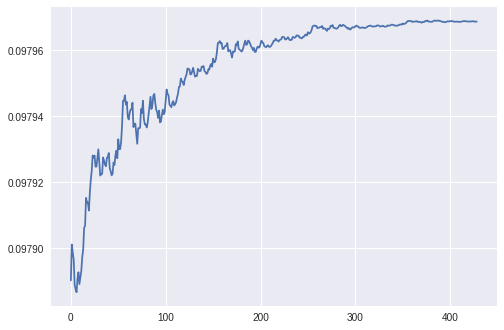

In [74]:
plt.plot(norm1)
plt.show()

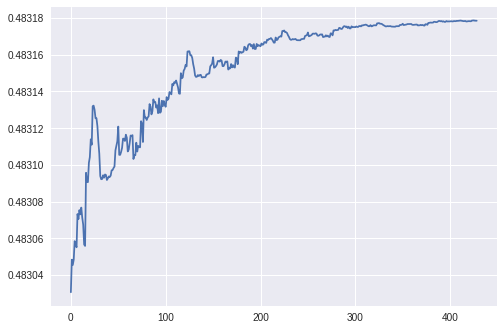

In [75]:
plt.plot(test_error1)
plt.show()

In [0]:
beta = np.random.uniform(-0.1, 0.1, size = 1000)
par2, trace2, norm2, test_error2 = sgd(0.001, X_train, Y_train, 1000,beta, X_test, Y_test)

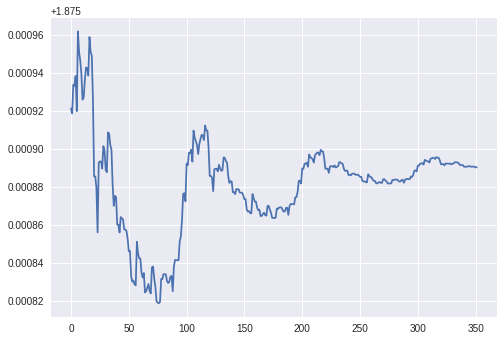

In [94]:
plt.plot(test_error2)
plt.show()

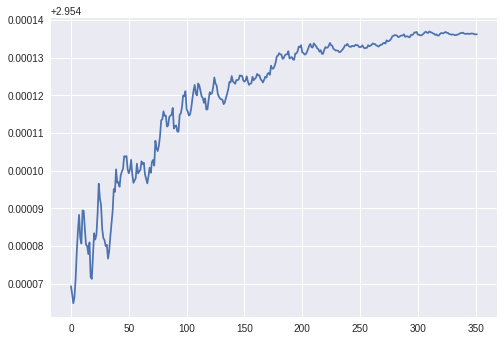

In [95]:
plt.plot(norm2)
plt.show()